<a href="https://colab.research.google.com/github/INIKA-N/Neural-Network/blob/main/Regression_TensorFlow_Keras_by_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
x = np.array([[-40,0,0], [-10,0,0],  [0,0,0],  [8,0,0], [15,0,0], [22,0,0]],  dtype=float)
y = np.array([-40,  14, 32, 46, 59, 72],  dtype=float)

In [3]:
x.shape

(6, 3)

In [4]:
layer_1 = tf.keras.layers.Dense(units=2, input_shape=[3]) # vertical stack with one node
layer_2 = tf.keras.layers.Dense(units=1) # vertical stack with one node

In [5]:
model = tf.keras.Sequential([layer_1, layer_2]) # horiz satack of layers

In [6]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
layer_1.get_weights()

[array([[ 1.040339  , -0.3388096 ],
        [-0.25164735, -0.9953855 ],
        [ 0.40143847,  0.62303066]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [9]:
layer_2.get_weights()

[array([[1.0453857 ],
        [0.61694443]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
history = model.fit(x, y, epochs=500, verbose=True)

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 1326.6027
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 1132.6605
Epoch 3/500
1/1 [==============================] - 0s 45ms/step - loss: 1016.7200
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 971.7054
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 977.8578
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 997.4402
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 997.5135
Epoch 8/500
1/1 [==============================] - 0s 25ms/step - loss: 973.4509
Epoch 9/500
1/1 [==============================] - 0s 39ms/step - loss: 937.1540
Epoch 10/500
1/1 [==============================] - 0s 26ms/step - loss: 901.4832
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 874.1853
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 857.0117
Epoch 13/500
1/1 [======

In [11]:
layer_1.get_weights()

[array([[ 0.903827  , -0.08262288],
        [-0.25164735, -0.9953855 ],
        [ 0.40143847,  0.62303066]], dtype=float32),
 array([4.7010727, 5.057916 ], dtype=float32)]

In [12]:
layer_2.get_weights()

[array([[2.2952735],
        [3.2952394]], dtype=float32),
 array([4.5445976], dtype=float32)]

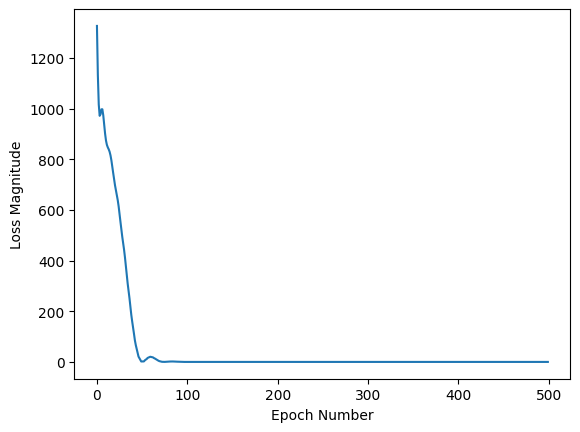

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [14]:
model.predict([[38,0,0]])

1/1 [==============================] - 0s 197ms/step


array([[100.48807]], dtype=float32)

In [15]:
print("These are the layer variables: {}".format(layer_1.get_weights()))

These are the layer variables: [array([[ 0.903827  , -0.08262288],
       [-0.25164735, -0.9953855 ],
       [ 0.40143847,  0.62303066]], dtype=float32), array([4.7010727, 5.057916 ], dtype=float32)]


In [16]:
# variables
W = tf.Variable([0.3], dtype=tf.float32)
c = tf.Variable([-0.3], dtype=tf.float32)
linear_model = W * [1.2] + c

print(W)
print(c)
print(linear_model)


<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3], dtype=float32)>
tf.Tensor([0.06], shape=(1,), dtype=float32)


## NN with More Layers

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')  # Assuming this is a regression task
])


model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(x, y, epochs=500, verbose=False)

In [20]:
print(model.predict([[38.0,0,0]]))

1/1 [==============================] - 0s 68ms/step
[[100.96469]]


In [21]:
print("Finished training the model")
print(model.predict([[38.0,57,88]]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([[38.0,57,88]])))

Finished training the model
1/1 [==============================] - 0s 32ms/step
[[219.82571]]
1/1 [==============================] - 0s 32ms/step
Model predicts that 100 degrees Celsius is: [[219.82571]] degrees Fahrenheit
